# Homework 7

In [8]:
import pandas as pd
%matplotlib inline

In [9]:
df = pd.read_csv('MKT 382 data 2021 Survey 2.csv', index_col=False)

## Preliminaries

In [10]:
df.columns = [
  "timestamp",
  "computer",
  "phone",
  "sports",
  "degree",
  "humor",
  "R",
  "SQL",
  "Python",
  "programming",
  "queso",
  "band",
  "instructor",
  "home",
  "city",
  "math",
  "sleep",
  "late",
  "vegetarian",
  "siblings"
]

## Problem 1

Generate a data frame (tibble or equivalent) showing the top three `siblings` values (in descending order). 

In [11]:
df['siblings'].nlargest(n=3)

15    6
11    4
43    4
Name: siblings, dtype: int64

## Problem 2

Generate a data frame showing the number of survey responses by degree in descending order of those counts.

In [12]:
prob2 = df.groupby(["degree"]).size()
prob2.sort_values(ascending = False)

degree
Business                                  22
Advertising, communications               19
Science or math                            6
Liberal arts (languages, history, etc)     4
Engineering                                1
Economics, policy, government              1
dtype: int64

## Problem 3

Generate a data frame of the mean instructor greatness responses by degree.  The data frame should be in descending order of mean greatness.

In [13]:
prob3 = df.groupby(["degree"]).instructor.agg("mean")
prob3.sort_values(ascending = False)

degree
Science or math                           5.000000
Liberal arts (languages, history, etc)    5.000000
Engineering                               5.000000
Economics, policy, government             5.000000
Advertising, communications               4.947368
Business                                  4.863636
Name: instructor, dtype: float64

## Problem 4

For Business majors, the count of responses by computer type.


In [14]:
prob4 = df.loc[df['degree'] == "Business"]

In [15]:
prob4.groupby(["computer"]).size()

computer
Mac           11
Windows PC    11
dtype: int64

## Problem 5

For Business majors with Macs, the mean number of siblings by queso.

In [16]:
prob5 = df[(df["degree"] == "Business") & (df["computer"]== "Mac")]

In [17]:
prob5.groupby("queso").siblings.agg("mean")

queso
Kirby Lane's    2.0
Torchy's        2.6
Name: siblings, dtype: float64

## Problem 6

Consider a strange metric that is `math+instructor`. This metric, which of course is the
sum of the "how much you like math" response and the "how great is the instructor response",
might have tremendous predictive value. Let's investigate.

Compute the mean value of this metric by `computer` value.


In [18]:
def my_metric(m,i):
  return m + i

In [19]:
df["math_instructor"] = my_metric(df["math"], df["instructor"])

In [20]:
df.groupby("computer").math_instructor.agg("mean")

computer
Both PC and Mac    8.000000
Mac                8.085714
Windows PC         7.944444
Name: math_instructor, dtype: float64

## Problem 7

Using [`.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) or some other technique, generate a histogram of the `math+instructor` values.

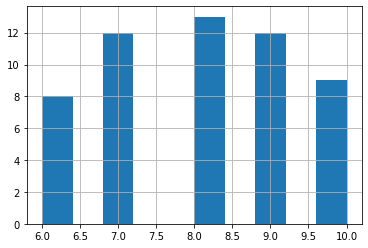

In [21]:
df.math_instructor.hist()

## Problem 8

For responses reporting one or two siblings, count votes for each `queso`.

In [23]:
king_queso = df.query("siblings == 1 | siblings == 2")
king_queso.groupby(["queso"]).size()

queso
Kirby Lane's     8
Torchy's        31
dtype: int64